In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        # Initialize weights with random numbers between -1 and 1
        np.random.seed(20)
        self.w = np.random.uniform(-1, 1, X.shape[1])
        self.b = np.random.uniform(-1, 1)
        
        self.initial_w = self.w.copy()
        self.initial_b = self.b
        
        print("Initial Weights:", self.initial_w)
        print("Initial Bias:", self.initial_b)
        print("\nTraining started-->")

        for _ in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.w) + self.b
                y_pred = 1 if linear_output >= 0 else -1

                # Perceptron update rule
                if y[i] != y_pred:
                    self.w += self.lr * y[i] * X[i]
                    self.b += self.lr * y[i]
        
        print("\nTraining completed")
        print("Final Weights:", self.w)
        print("Final Bias:", self.b)

    def predict(self, X):
        return np.array([1 if np.dot(x, self.w) + self.b >= 0 else -1 for x in X])

#### Note: Data point must be linearly separable in case of Single Perceptron

In [14]:
X = np.array([
    [2, 3],
    [4, 5],
    [5, 10],
    [1, 4],
    [3, 4],
    [6, 2],
    [7, 3],
    [8, 1],
    [2, 8],
    [3, 7],
    [5, 6],
    [6, 5],
    [3, 6],
    [5, 1],
    [4, 10],
    [3, 7],
    [6, 10]
])

y = np.array([-1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1])

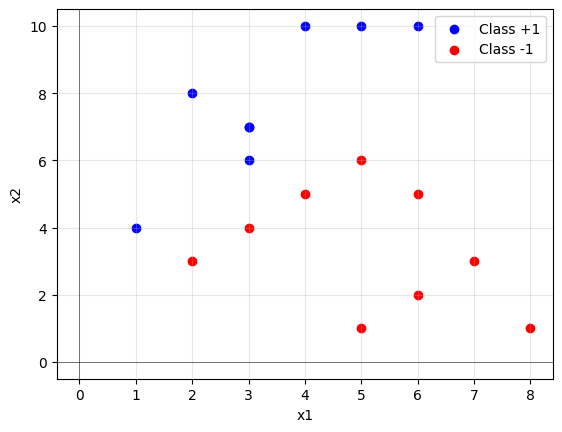

In [ ]:
def plot_of_points(X, y):
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Class -1')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
        borderaxespad=0
    )
    plt.grid(True, alpha=0.3)
    plt.show()
plot_of_points(X, y)


Training with epochs = 1
Initial Weights: [0.1762616  0.79542746]
Initial Bias: 0.783061458949416

Training started-->

Training completed
Final Weights: [-0.2237384   1.39542746]
Final Bias: 0.5830614589494161


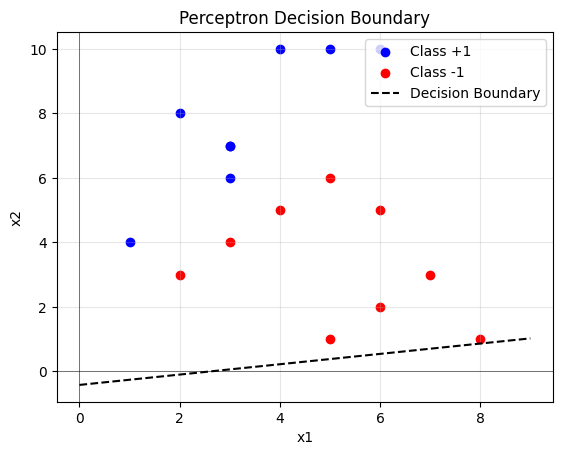


Training with epochs = 3
Initial Weights: [0.1762616  0.79542746]
Initial Bias: 0.783061458949416

Training started-->

Training completed
Final Weights: [-0.7237384   1.69542746]
Final Bias: 0.3830614589494161


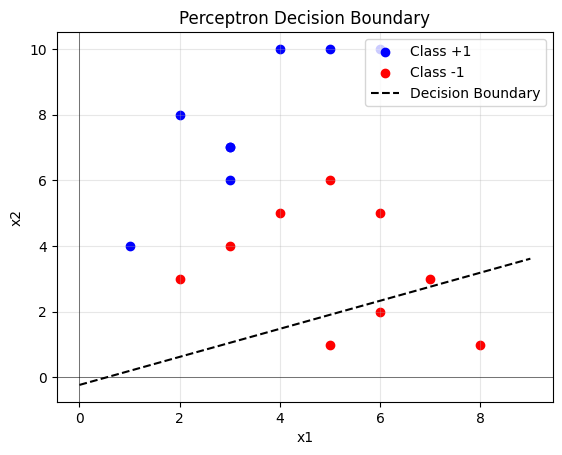


Training with epochs = 5
Initial Weights: [0.1762616  0.79542746]
Initial Bias: 0.783061458949416

Training started-->

Training completed
Final Weights: [-1.5237384   1.19542746]
Final Bias: 0.08306145894941613


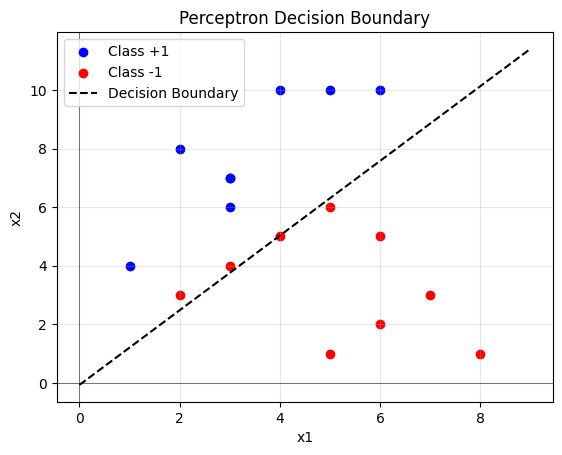


Training with epochs = 10
Initial Weights: [0.1762616  0.79542746]
Initial Bias: 0.783061458949416

Training started-->

Training completed
Final Weights: [-1.7237384   1.09542746]
Final Bias: -0.11693854105058388


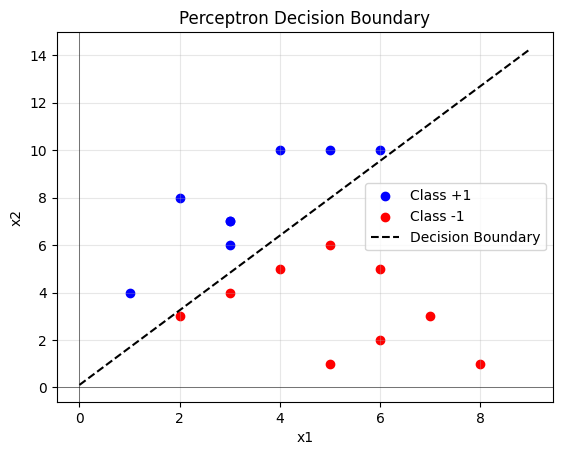

In [28]:
for k in [1, 3, 5, 10]:
    print(f"\nTraining with epochs = {k}")
    model = Perceptron(lr=0.1, epochs=k)
    model.fit(X, y)
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Class -1')

    x_vals = np.linspace(0, 9, 100)
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]

    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    # Add axes through origin
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.grid(True, alpha=0.3)
    plt.show()

In [29]:
model = Perceptron(lr=0.1, epochs=10)
model.fit(X, y)

Initial Weights: [0.1762616  0.79542746]
Initial Bias: 0.783061458949416

Training started-->

Training completed
Final Weights: [-1.7237384   1.09542746]
Final Bias: -0.11693854105058388


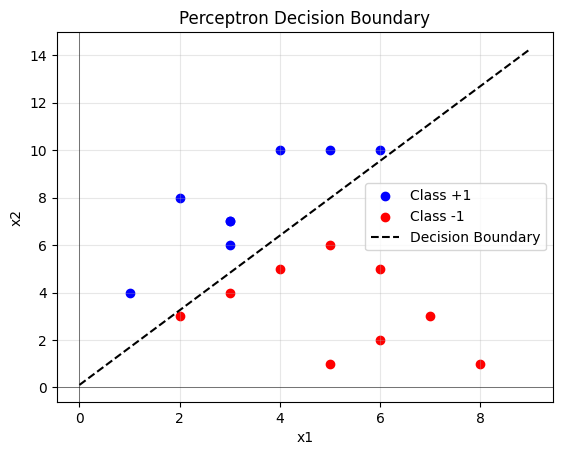

In [30]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Class -1')

    x_vals = np.linspace(0, 9, 100)
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]

    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    # Add axes through origin
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary(X, y, model)

In [6]:
def perceptron(x, w, b):
    return 1 if np.dot(x, w) + b >= 0 else 0

In [7]:
def activation_step_function(weighted_sum):
    """Returns 1 if weighted sum is non-negative, otherwise 0"""
    return 1 if weighted_sum >= 0 else 0

def compute_weighted_sum(inputs, weights, bias):
    """Calculates weighted sum of inputs plus bias"""
    return np.dot(inputs, weights) + bias

def xor_using_perceptron_network(input_pair):
    # First layer: OR gate (at least one input must be 1)
    or_weights = [1, 1]
    or_bias = -0.5
    or_weighted_sum = compute_weighted_sum(input_pair, or_weights, or_bias)
    or_gate_output = activation_step_function(or_weighted_sum)
    
    # First layer: NAND gate (not both inputs are 1)
    nand_weights = [-1, -1]
    nand_bias = 1.5
    nand_weighted_sum = compute_weighted_sum(input_pair, nand_weights, nand_bias)
    nand_gate_output = activation_step_function(nand_weighted_sum)
    
    # Second layer: AND gate combining OR and NAND outputs
    # XOR = (A OR B) AND (NOT (A AND B))
    and_weights = [1, 1]
    and_bias = -1.5
    combined_inputs = [or_gate_output, nand_gate_output]
    and_weighted_sum = compute_weighted_sum(combined_inputs, and_weights, and_bias)
    xor_output = activation_step_function(and_weighted_sum)
    
    return xor_output

### Logic


#### XOR = (A OR B) AND (NOT (A AND B))

In [8]:
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

print("Input1 | Input2 | XOR Output")
for input_values in X_xor:
    input1, input2 = input_values[0], input_values[1]
    xor_result = xor_using_perceptron_network(input_values)
    print(f"   {input1}        {input2}        {xor_result}")

Input1 | Input2 | XOR Output
   0        0        0
   0        1        1
   1        0        1
   1        1        0


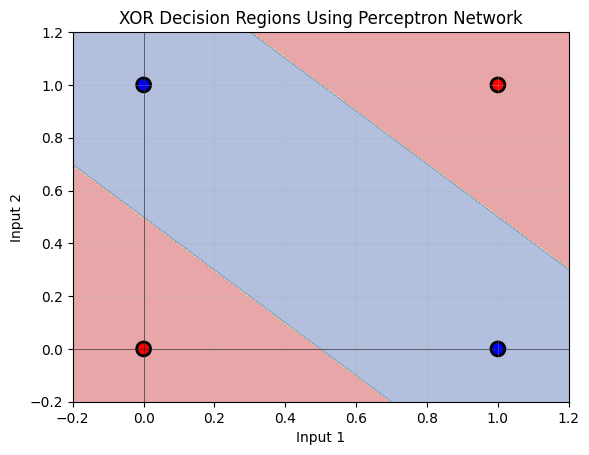

In [9]:
grid_resolution = 200
grid_range = (-0.2, 1.2)

x1_grid, x2_grid = np.meshgrid(
    np.linspace(grid_range[0], grid_range[1], grid_resolution),
    np.linspace(grid_range[0], grid_range[1], grid_resolution)
)

grid_predictions = np.array([
    xor_using_perceptron_network([x1, x2]) 
    for x1, x2 in zip(x1_grid.ravel(), x2_grid.ravel())
])
grid_predictions = grid_predictions.reshape(x1_grid.shape)

# Visualize decision regions
plt.contourf(x1_grid, x2_grid, grid_predictions, alpha=0.4, cmap='RdYlBu')

# Plot XOR truth table points
xor_inputs = [0, 0, 1, 1]
xor_outputs = [0, 1, 0, 1]
point_colors = ['red', 'blue', 'blue', 'red']

# Add axes through origin
plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)

plt.scatter(xor_inputs, xor_outputs, 
           c=point_colors, s=100, edgecolors='black', linewidths=2)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Decision Regions Using Perceptron Network")
plt.grid(True, alpha=0.3)
plt.show()